In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torchsummary import summary
from torch.utils.data import Dataset, TensorDataset

# from torch.utils.data import DataLoader
torch.utils.data.DataLoader

torch.utils.data.dataloader.DataLoader

In [30]:
def polynomial_function(x):
    return 5 * x**3 - 8 * x**2 - 7 * x + 1

In [31]:
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.FL1 = nn.Linear(1, 32)  # defining hidden layers
        self.FL2 = nn.Linear(32, 64)
        self.FL3 = nn.Linear(64, 128)
        self.FL4 = nn.Linear(128, 1)

    def forward(self, x):
        x = torch.relu(self.FL1(x))  # initializing activation function
        x = torch.relu(self.FL2(x))
        x = torch.relu(self.FL3(x))
        x = torch.relu(self.FL4(x))
        return x

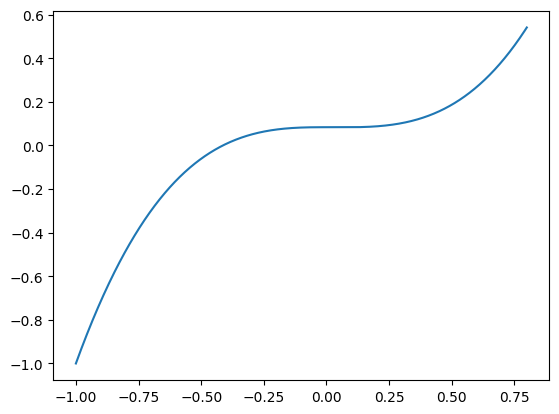

In [32]:
x_train = torch.arange(-20, 20, 0.04)
y_train = polynomial_function(x_train)

x_train_norm = (x_train - torch.min(x_train)) / (
    torch.max(x_train) - torch.min(x_train)
) * 2 - 1
y_train_norm = (y_train - torch.min(y_train)) / (
    torch.max(y_train) - torch.min(y_train)
) * 2 - 1

# Split the normalized data
train_size = int(0.9 * len(x_train))
val_size = int(0.95 * len(x_train))

x_train = x_train_norm[:train_size]
y_train = y_train_norm[:train_size]

x_val = x_train_norm[train_size:val_size]
y_val = y_train_norm[train_size:val_size]

x_test = x_train_norm[val_size:]
y_test = y_train_norm[val_size:]

# print(len(x_train))
# print(len(x_val))
# print(len(x_test))

plt.plot(x_train, y_train)

In [33]:
train_data = TensorDataset(x_train, y_train)
train_data_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_data = TensorDataset(x_val, y_val)
val_data_loader = DataLoader(val_data, batch_size=32)
test_data = TensorDataset(x_test, y_test)
test_data_loader = DataLoader(test_data, batch_size=32)

In [34]:
model = DNN()
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)
print(model)
summary(model, (1,))

DNN(
  (FL1): Linear(in_features=1, out_features=32, bias=True)
  (FL2): Linear(in_features=32, out_features=64, bias=True)
  (FL3): Linear(in_features=64, out_features=128, bias=True)
  (FL4): Linear(in_features=128, out_features=1, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 32]              64
            Linear-2                   [-1, 64]           2,112
            Linear-3                  [-1, 128]           8,320
            Linear-4                    [-1, 1]             129
Total params: 10,625
Trainable params: 10,625
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04
----------------------------------------------------------------
